In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/data_YesBank_StockPrices.csv')
df.head(3)
#Dataset importing

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30


#Exploratory Data Analysis

In [2]:
df.shape
#The data has 185 row and 5 column

(185, 5)

In [3]:
df.info()
#using info we know the datatype of each column and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [4]:
df.tail(2)

,Date,Open,High,Low,Close
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [5]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
#Plotting the candlestick_chart

In [6]:
fig

In [7]:
#Here we see the stock price has dropped rapidly after 18-sept-2018 because of the fraud in yes bank

In [8]:
def b(y):
  return y[1]
#Defining the function to extract year and month in the seperate column

In [9]:
df['month']=df['Date'].str.split("-")

In [10]:
df['Year']=df['month'].apply(b)

In [11]:
df.head(2)

,Date,Open,High,Low,Close,month,Year
0,Jul-05,13.00,14.00,11.25,12.46,"[Jul, 05]",05
1,Aug-05,12.58,14.88,12.55,13.42,"[Aug, 05]",05


In [12]:
def b(y):
  return y[0]

In [13]:
df['Month']=df['month'].apply(b)
df.head(2)

,Date,Open,High,Low,Close,month,Year,Month
0,Jul-05,13.00,14.00,11.25,12.46,"[Jul, 05]",05,Jul
1,Aug-05,12.58,14.88,12.55,13.42,"[Aug, 05]",05,Aug


In [14]:
encoders={'Month':{"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}}
df.replace(encoders,inplace=True)
#Encoding is done to replace catgorical column to numerical column

In [15]:
df.head(2)

,Date,Open,High,Low,Close,month,Year,Month
0,Jul-05,13.00,14.00,11.25,12.46,"[Jul, 05]",05,7
1,Aug-05,12.58,14.88,12.55,13.42,"[Aug, 05]",05,8


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
 5   month   185 non-null    object 
 6   Year    185 non-null    object 
 7   Month   185 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 11.7+ KB


In [17]:
print(df['High'].max())
print(df['Low'].min())
#The stock touched the maximum height of Rs.404
#The stock touched the minimum height of Rs.5.55

404.0
5.55


In [18]:
df['Year']=df['Year'].astype(int)

In [19]:
df.drop('month',axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
 5   Year    185 non-null    int64  
 6   Month   185 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 10.2+ KB


In [21]:
df.head(2)

,Date,Open,High,Low,Close,Year,Month
0,Jul-05,13.00,14.00,11.25,12.46,5,7
1,Aug-05,12.58,14.88,12.55,13.42,5,8


In [22]:
df.drop('Date',axis=1,inplace=True)

#Breaking the original dataset into two subset that is before and after the fraud.

In [23]:
df1=df[(df['Year']==18)&(df['Month']>=9)]

In [24]:
df2=df[df['Year']>18]

In [25]:
df1.shape

(4, 6)

In [26]:
df2.shape

(23, 6)

In [27]:
df_after=pd.concat([df1,df2],axis=0)
df_after.shape

(27, 6)

In [28]:
df3=df[(df['Year']==18)&(df['Month']<9)]
df4=df[(df['Year']<18)]
df_before=pd.concat([df3,df4],axis=0)
df_before.shape

(158, 6)

In [31]:
df_before.tail()

,Open,High,Low,Close,Year,Month
145,363.0,368.52,337.37,351.15,17,8
146,351.0,383.25,345.50,350.00,17,9
147,354.6,375.75,299.00,314.35,17,10
148,315.5,329.80,296.00,306.80,17,11
149,307.2,319.00,300.65,315.05,17,12


In [32]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Year', 'Month'], dtype='object')

<Axes: >

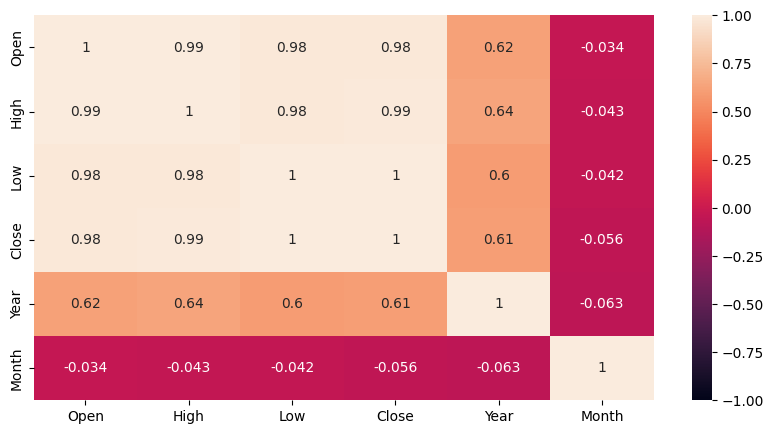

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)

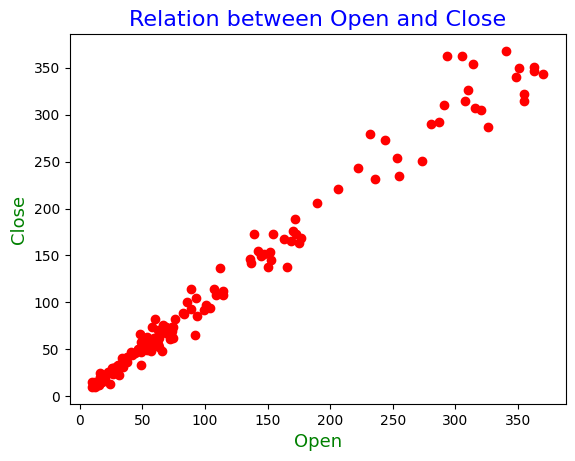

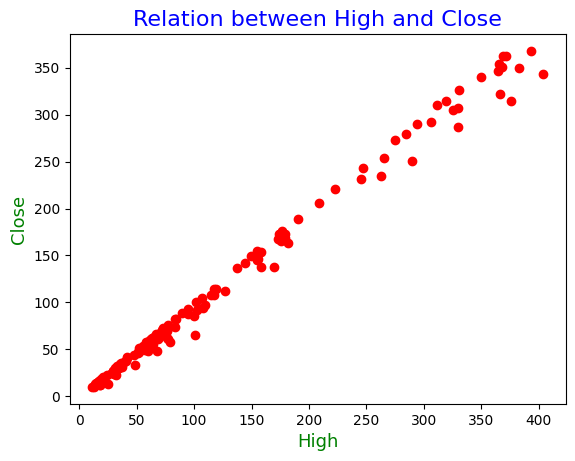

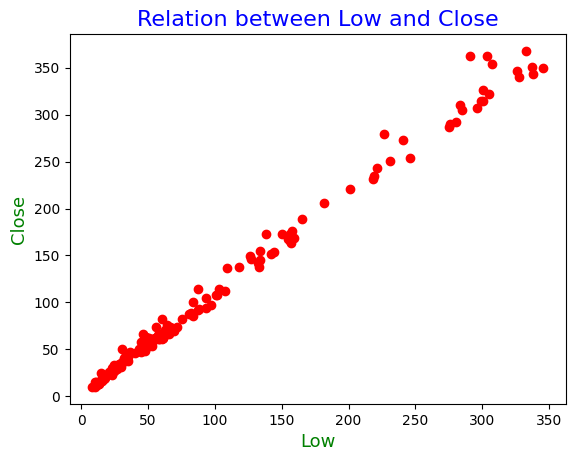

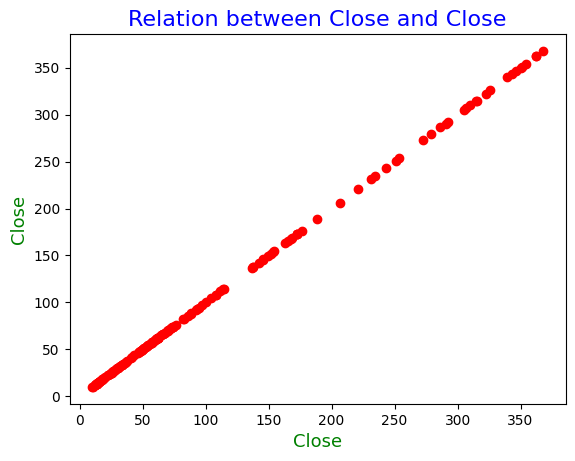

In [33]:
#Plotting the scatter plot between different features
features=['Open','High','Low','Close']
for col in features:
  plt.scatter(df_before[col],df_before['Close'],color='r')
  plt.xlabel(col,color='g',fontsize=13)
  plt.ylabel('Close',color='g',fontsize=13)
  plt.title(f'Relation between {col} and Close',color='b',fontsize=16)
  plt.show()

<ipython-input-38-a7b4c50cf218>:3: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries



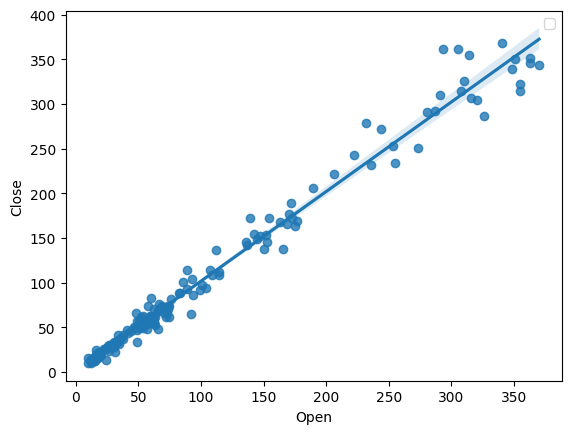

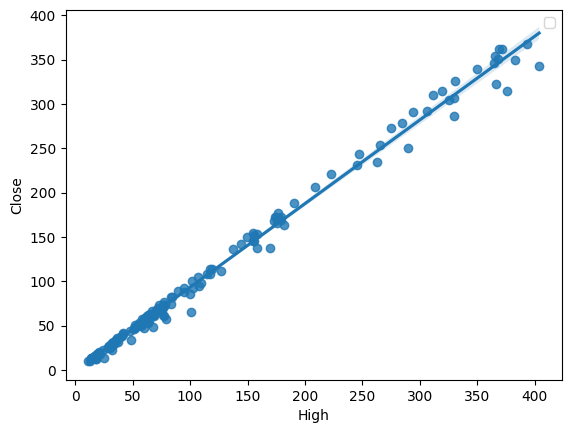

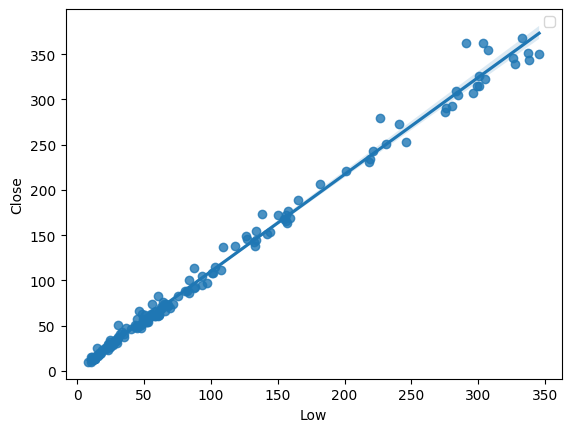

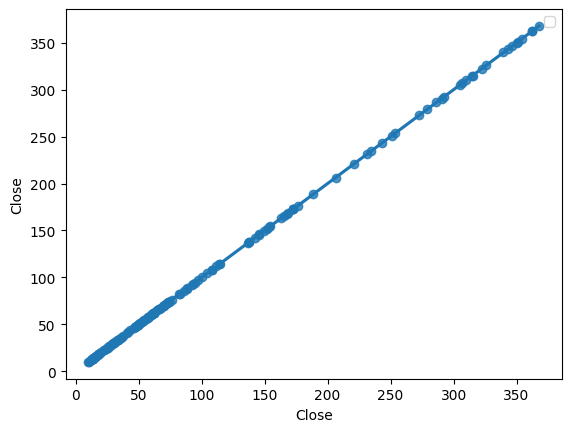

In [ ]:
for col in features:
  sns.regplot(x=col,y="Close",data=df_before)
  plt.legend(col,"Close")
  plt.show()

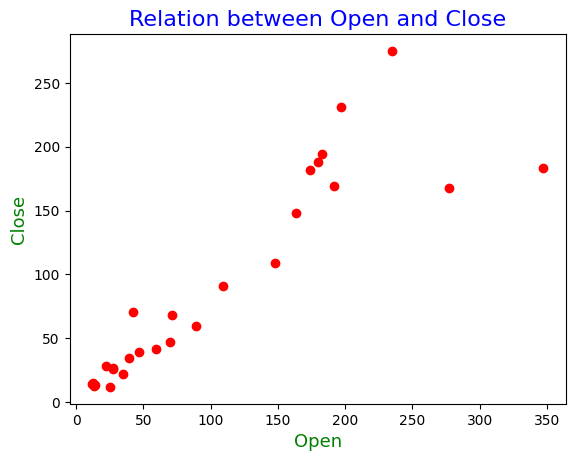

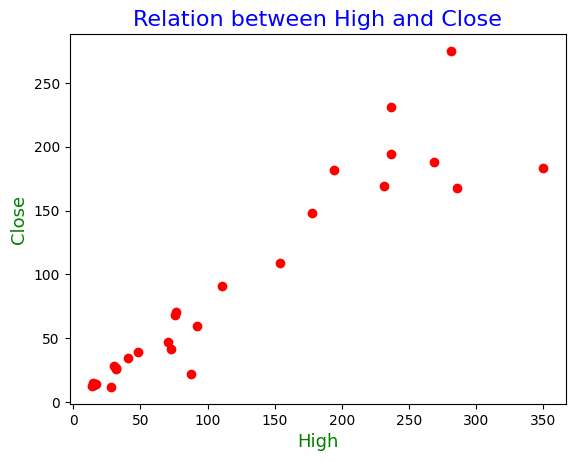

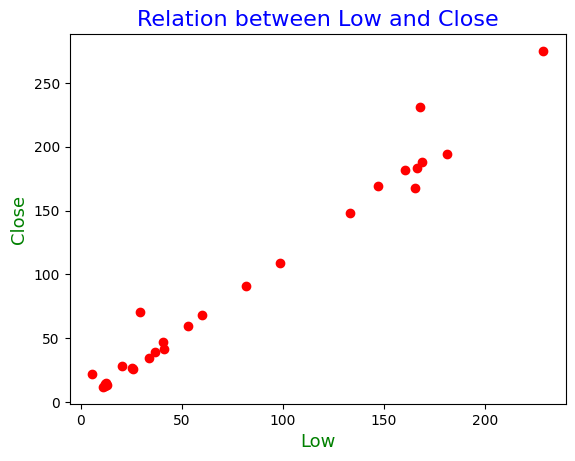

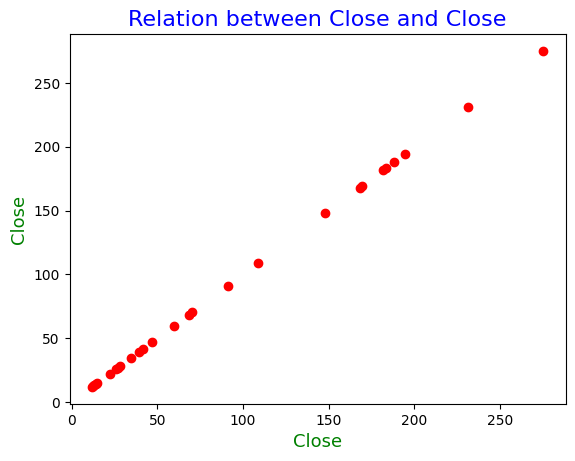

In [ ]:
features=['Open','High','Low','Close']
for col in features:
  plt.scatter(df_after[col],df_after['Close'],color='r')
  plt.xlabel(col,color='g',fontsize=13)
  plt.ylabel('Close',color='g',fontsize=13)
  plt.title(f'Relation between {col} and Close',color='b',fontsize=16)
  plt.show()

<ipython-input-201-f262b323a1b7>:4: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries



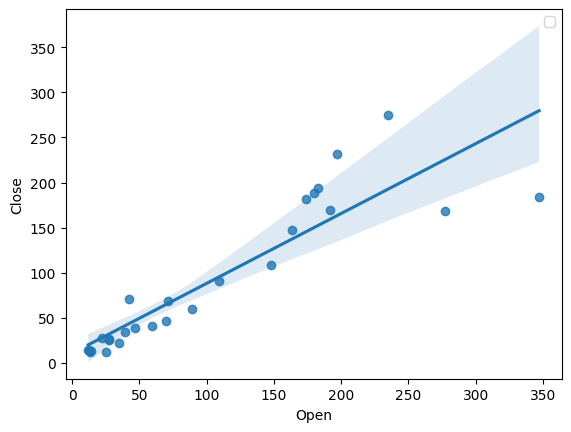

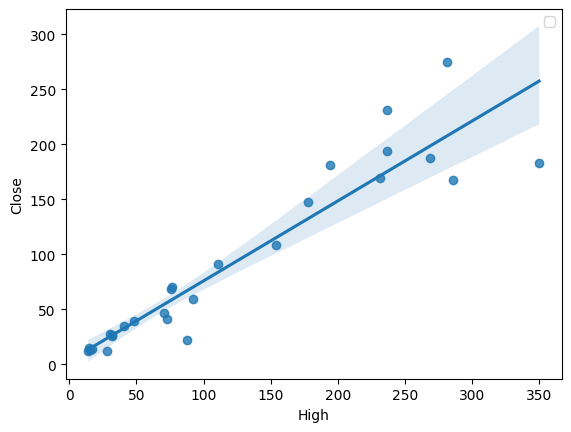

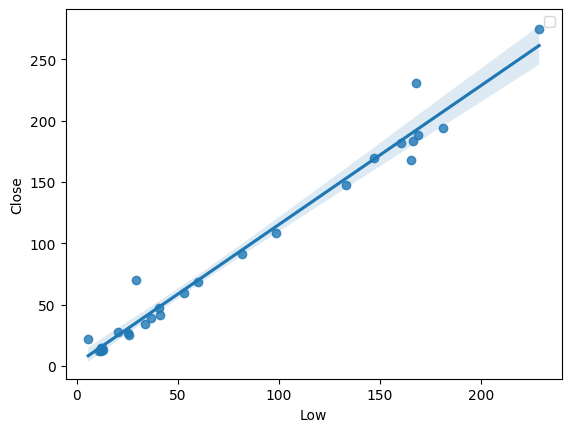

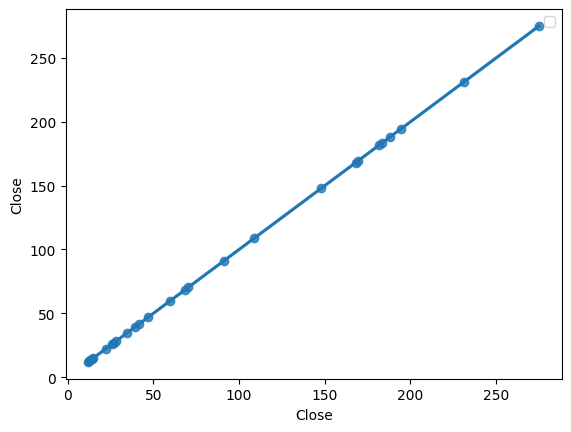

In [ ]:
#Plotting regression plot betwen different features
for col in features:
  sns.regplot(x=col,y="Close",data=df_after)
  plt.legend(col,"Close")
  plt.show()

<ipython-input-203-44fe24fe7369>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




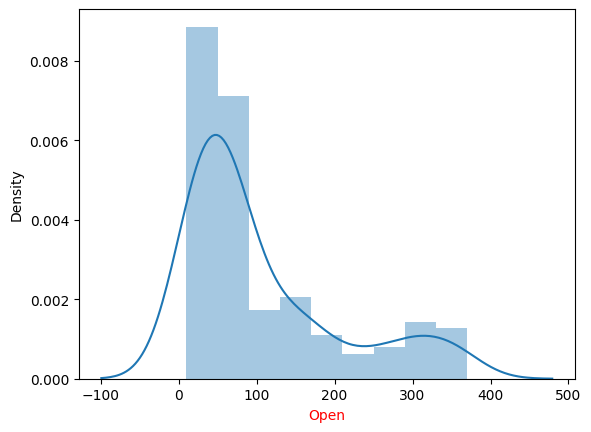

<ipython-input-203-44fe24fe7369>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




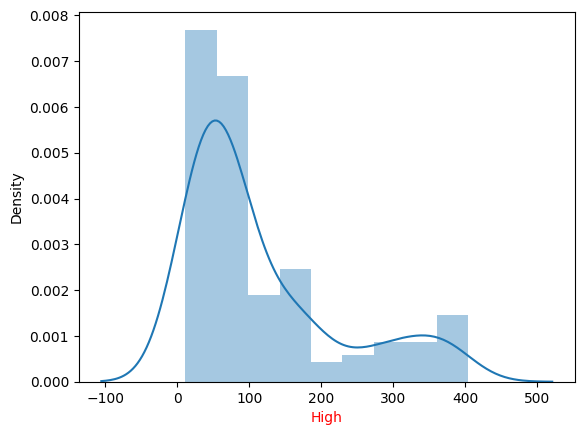

<ipython-input-203-44fe24fe7369>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




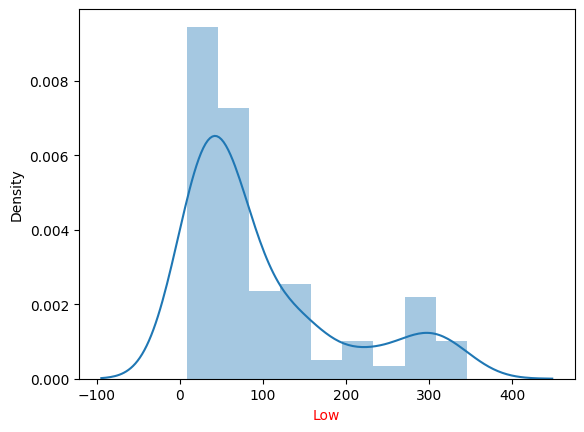

<ipython-input-203-44fe24fe7369>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




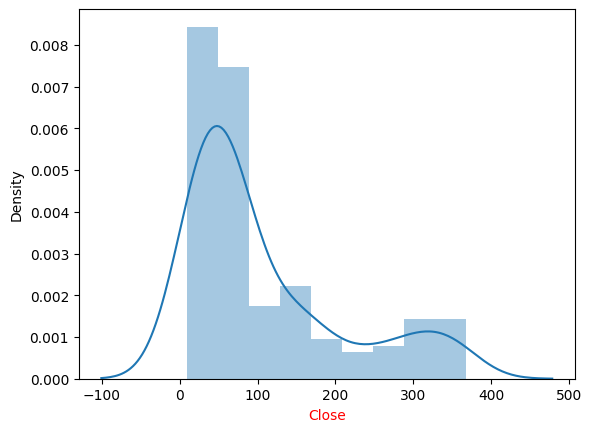

In [ ]:
#Plottting distplot between different features
for col in features:
  sns.distplot(df_before[col])
  plt.xlabel(col,color='r')
  plt.show()
  #The data is positively skewed

#1.Before fraud News**

#Training the model using Linear_Regression.

In [ ]:
x=df.drop('Close',axis=1)
y=df['Close']

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error,mean_absolute_error

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train_std=std.fit_transform(x_train)
x_test_std=std.transform(x_test)
regressor=LinearRegression()
regressor.fit(x_train_std,y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

98.37756756756758
[-42.24394035  48.08640536  89.04802979  -0.26267057  -1.32046942]


In [ ]:
print(regressor.score(x_train_std,y_train))
print(regressor.score(x_test_std,y_test))
y_pred=regressor.predict(x_test_std)

0.9956465282860846
0.9928422855965229


Text(0, 0.5, 'y_pred')

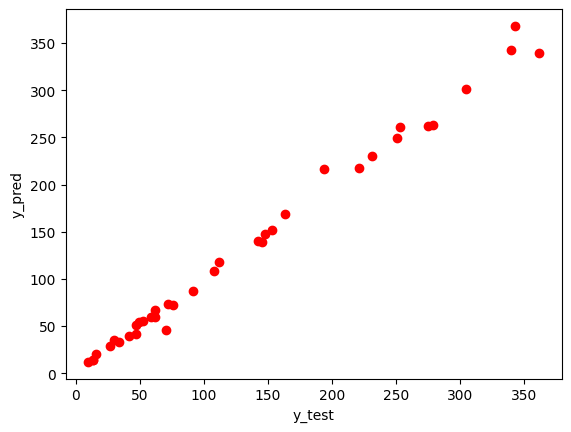

In [ ]:
plt.scatter(y_test,y_pred,color='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')

Evaluation metric for Linear Regression

In [ ]:
print(f"r2_score:{r2_score(y_test,y_pred)}")
print(f"MSE:{mean_squared_error(y_test,y_pred)}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))}")

r2_score:0.9928422855965229
MSE:80.5665353537493
RMSE:8.975886326917767


#Training the model using Lasso:

#Lasso

In [ ]:
alphas=[0.001,0.002,0.2,0.4,0.5,0.1,1,2,3,4]
for alpha in alphas:
  b=Lasso(alpha,fit_intercept=True)
  lasso=b.fit(x_train,y_train)
  print("coefficient:",lasso.coef_)
  print("Intercept:",lasso.intercept_)
  print(lasso.score(x_train,y_train))
  print(lasso.score(x_test,y_test))

coefficient: [-0.43830772  0.46679191  1.00978542 -0.05901402 -0.39127821]
Intercept: 4.6418937434921475
0.9956465282596505
0.9928423195089503
coefficient: [-0.43828614  0.4667699   1.00978485 -0.05891816 -0.39118365]
Intercept: 4.640384853180095
0.9956465281803593
0.9928423534349409
coefficient: [-0.43404529  0.46243813  1.00967459 -0.0399486  -0.37245967]
Intercept: 4.34163452949052
0.9956454744211719
0.9928480999731375
coefficient: [-0.42982151  0.45811219  1.00957109 -0.02080291 -0.35354309]
Intercept: 4.039873340149768
0.9956423253321222
0.9928519398438928
coefficient: [-0.42773268  0.45596764  1.00952309 -0.01123488 -0.3440833 ]
Intercept: 3.8889879052953376
0.9956399708780543
0.9928531288629838
coefficient: [-0.43617938  0.46461941  1.00972933 -0.04952706 -0.38191666]
Intercept: 4.492516865985621
0.995646264404266
0.9928454384585187
coefficient: [-0.41813919  0.44794076  1.00814304 -0.         -0.29994375]
Intercept: 3.505840147488925
0.9956279238675793
0.9928234026895465
coeffi

In [ ]:
y_pred_lasso=lasso.predict(x_test)

Text(0, 0.5, 'y_pred')

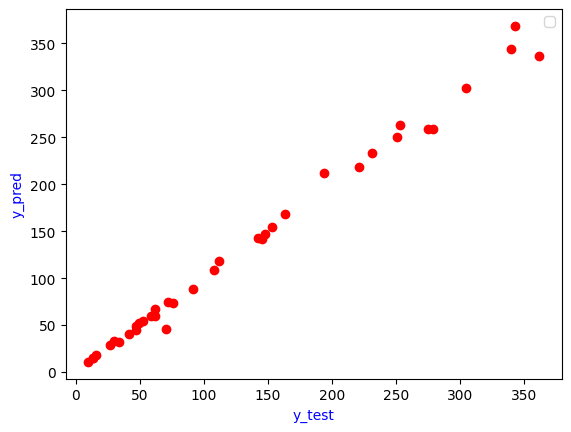

In [ ]:
plt.scatter(y_test,y_pred_lasso,color='r')
plt.legend()
plt.xlabel('y_test',color='b')
plt.ylabel('y_pred',color='b')

Evaluation metric for lasso:


In [ ]:
print(f"r2_score:{r2_score(y_test,y_pred_lasso)}")
print(f"MSE:{mean_squared_error(y_test,y_pred_lasso)}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test,y_pred_lasso))}")

r2_score:0.9924342648751698
MSE:85.15917680588423
RMSE:9.228172993929201


#Training the model using Ridge

#Ridge

In [ ]:
c=Ridge(alpha=0.3,fit_intercept=True)
ridge=c.fit(x_train,y_train)
print("coefficient:",ridge.coef_)
print("Intercept:",ridge.intercept_)

coefficient: [-0.43831102  0.46680182  1.00977965 -0.05909222 -0.39130354]
Intercept: 4.642798292633174


In [ ]:
print(ridge.score(x_train,y_train))
print(ridge.score(x_test,y_test))

0.9956465282752717
0.9928422672047849


In [ ]:
y_pred_ridge=ridge.predict(x_test)

Text(0, 0.5, 'y_pred')

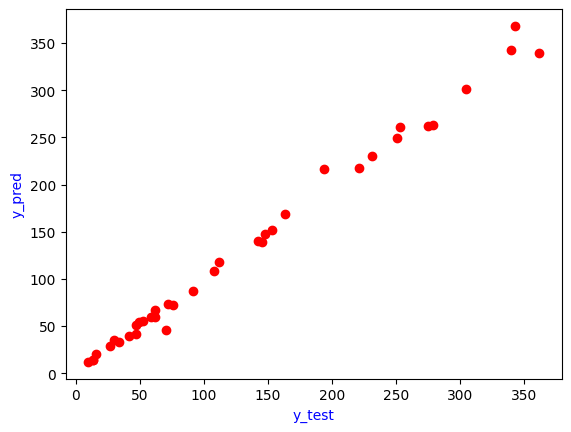

In [ ]:
plt.scatter(y_test,y_pred_ridge,color='r')
plt.xlabel('y_test',color='b')
plt.ylabel('y_pred',color='b')

Evaluation metric for Ridge

In [ ]:
print(f"r2_score:{r2_score(y_test,y_pred_ridge)}")
print(f"MSE:{mean_squared_error(y_test,y_pred_ridge)}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test,y_pred_ridge))}")

r2_score:0.993081476009746
MSE:77.87423138673883
RMSE:8.824637748187675


#GridSearchCV

In [ ]:
parameters={'alpha':[0.001,0.002,0.003,0.004,0.3,0.2,0.4,0.5,0.1]}
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(Lasso(),parameters,cv=4)

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.002, 0.003, 0.004, 0.3, 0.2, 0.4,
                                   0.5, 0.1]})

In [ ]:
grid.best_params_

{'alpha': 0.5}

In [ ]:
grid.best_estimator_

Lasso(alpha=0.5)

In [ ]:
grid.fit(x_train,y_train)
print(grid.score(x_train,y_train))
print(grid.score(x_test,y_test))
y_pred_grid=grid.predict(x_test)

0.9956399708780543
0.9928531288629838


In [ ]:
print(f"r2_score:{r2_score(y_test,y_pred_grid)}")
print(f"MSE:{mean_squared_error(y_test,y_pred_grid)}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test,y_pred_grid))}")

r2_score:0.9928531288629838
MSE:80.444484603827
RMSE:8.969084936816408


#2.After the fraud News

#Training the model using Linear Regression

In [ ]:
print(df_after.shape)

(27, 6)


In [ ]:
x_after=df_after.iloc[:,:-1]
y_after=df_after.iloc[:,-1]

In [ ]:
x_train_after,x_test_after,y_train_after,y_test_after=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train_std_after=std.fit_transform(x_train_after)
x_test_std_after=std.transform(x_test_after)
regressor_after=LinearRegression()
regressor_after.fit(x_train_std_after,y_train_after)
print(regressor_after.coef_)
print(regressor_after.intercept_)

[ 1.87863389 -4.2786988  -2.27314265  0.63866573 -4.39859298]
6.809523809523815


#Lasso

In [ ]:
lasso_after=Lasso(alpha=0.0001,fit_intercept=True)
lasso_after.fit(x_train_std_after,y_train_after)
print(lasso_after.intercept_)
print(lasso_after.coef_)

6.809523809523815
[ 1.86915295 -4.26876804 -2.25611285  0.62087475 -4.3986065 ]


In [ ]:
y_pred_lasso_after=lasso_after.predict(x_test_std_after)
print(f"r2_score:{r2_score(y_test_after,y_pred_lasso_after)}")
print(f"MSE:{mean_squared_error(y_test_after,y_pred_lasso_after)}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test_after,y_pred_lasso_after))}")


r2_score:0.6855699243565625
MSE:4.55050192806197
RMSE:2.1331905512780547


#Ridge

In [ ]:
ridge_after=Ridge(alpha=0.001,fit_intercept=True)
ridge_after.fit(x_train_std_after,y_train_after)
print(ridge_after.intercept_)
print(ridge_after.coef_)

6.809523809523815
[ 1.86790398 -4.26614821 -2.25996612  0.62395339 -4.3979371 ]


In [ ]:
y_pred_ridge_after=ridge_after.predict(x_test_std_after)
print(f"r2_score:{r2_score(y_test_after,y_pred_ridge_after)}")
print(f"MSE:{mean_squared_error(y_test_after,y_pred_ridge_after)}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test_after,y_pred_ridge_after))}")

r2_score:0.6854902882600515
MSE:4.551654439347588
RMSE:2.13346067208833


#GridSearchCV implementation

In [ ]:
parameters={"alpha":[-1e-2,-1e-3,-1e-4,-1e-6,0.01]}
grid_after=GridSearchCV(Lasso(),parameters,cv=5)
grid_after.fit(x_train_after,y_train_after)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.512e-01, tolerance: 1.744e-02

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e-01, tolerance: 1.885e-02

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


20 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-----------------------

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [-0.01, -0.001, -0.0001, -1e-06, 0.01]})

In [ ]:
print(grid_after.best_params_)
print(grid_after.best_estimator_)

{'alpha': 0.01}
Lasso(alpha=0.01)


In [ ]:
y_pred_grid_after=grid_after.predict(x_test_after)
print(f"r2_score:{r2_score(y_test_after,y_pred_grid_after)}")
print(f"MSE:{mean_squared_error(y_test_after,y_pred_grid_after)}")
print(f"RMSE:{np.sqrt(mean_squared_error(y_test_after,y_pred_grid_after))}")

r2_score:0.6835066243957721
MSE:4.58036246360563
RMSE:2.1401781382879395
